# Training models

This notebook will focus on machine learning models. When using **CellRake** to identify the cells on a fluorescence image, it is essential to train a model to determine which segmentations correspond to cells and which do not. To achieve this objective, we will train a machine-learning classifier using a set of input images.

We will start by importing the necessary packages for our analysis, including the functions from `cellrake`. Ensure you have correctly installed `cellrake` in your Conda environment following the instructions in [README.md](../README.md) and that you are running this notebook with this environment (top right corner of the notebook if you are using VSCode).

In [3]:
from pathlib import Path
import pandas as pd

from cellrake.main import train
from cellrake.training import evaluate

When running the function `train`, the images of the given folder will be segmented, and different features, such as intensity and area, will be automatically extracted. After this process, you will have to label the possible cells manually:

- You will be presented with some images of the possible cells. The images consist of four panels representing the same cell, the original size on the left panels, and zoomed in on the right panels, in which the cell is highlighted in blue in two of the panels.
- For each image, you must type `1` if it is a positive cell or `0` if not. If you run the code in VSCode, the user prompt will appear in the upper part of the screen (close to the VSCode search bar).

By default, the `train` function uses a pipeline composed of a standardization function, a PCA, and a [**support vector machine**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (`svm`) optimized through a random search. Other architectures are also available based on [**logistic regressions**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (`logreg`) and [**random forests**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (`rf`). For more information, type `help(train)`, `help(train_svm)`, `help(train_logreg)`, and `help(train_rf)`.

In [ ]:
tdt_folder = Path("./sample_data/tdt")
best_model, X_train, y_train, X_test, y_test = train(tdt_folder)

After the training is completed, the best model obtained after the random search will be automatically saved outside the image folder. The console will print the best hyperparameters found and the best accuracy of the model. The data frame with the extracted features will also be stared as a CSV file.

You can use the function `evaluate` with both the training and testing datasets to evaluate the model properly. This function prompts a confusion matrix and a precision-recall plot and saves a copy of the evaluation parameters in a CSV file. For more information, I highly recommend you to take a look at the tutorials and guides from [**scikit-learn**](https://scikit-learn.org/stable/).

Confusion matrix: 
[[ 9  1]
 [ 0 86]]


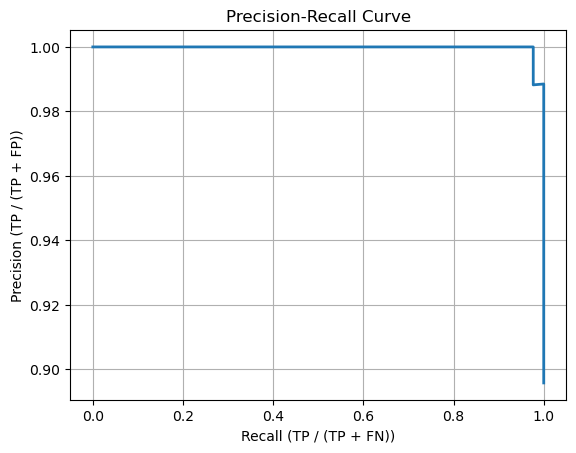

In [7]:
evaluate(tdt_folder, best_model, X_train, y_train, plot=True)

Confusion matrix: 
[[ 1  2]
 [ 2 20]]


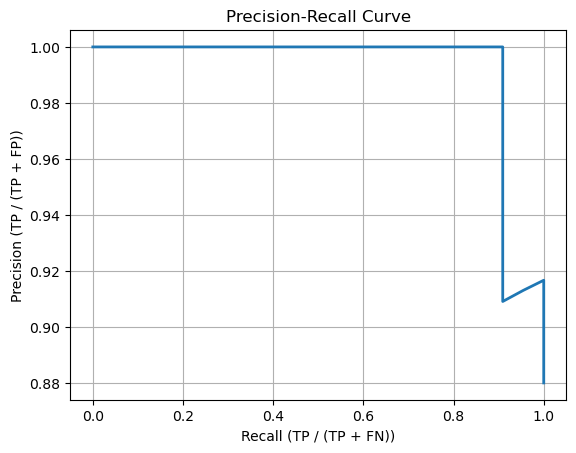

In [8]:
evaluate(tdt_folder, best_model, X_test, y_test, plot=True)